# Grafos

* Matías Battocchia
* Científico de datos en [Mutt Data](https://www.muttdata.ai)
* Tesista en [CoCuCo Lab](https://www.cocucolab.com)
* battox@gmail.com

### ¿Qué es un grafo?

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5b/6n-graf.svg" width=200>

* Red — grafo, *graph*
  * Nodos — vértices, *nodes*
  * Conexiones — aristas, bordes, *edges*

### ¿Para qué sirven?

Es una estructura de datos útil para representar:

* redes sociales
* máquinas de estado
* moléculas
* mapas conceptuales
* estructura del lenguaje
* redes de transporte
* y mucho más...

Ver [glosario de teoría de grafos](https://es.wikipedia.org/wiki/Anexo:Glosario_de_teor%C3%ADa_de_grafos).

## NetworkX

https://networkx.github.io

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [ ]:
!pip install networkx

In [23]:
%matplotlib inline

import networkx as nx

G = nx.Graph()

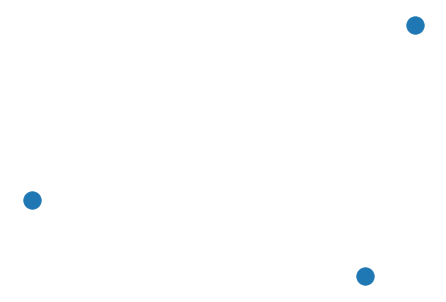

In [24]:
G.add_node('Buenos Aires')
G.add_node('Córdoba')
G.add_node('Mendoza')

nx.draw(G)

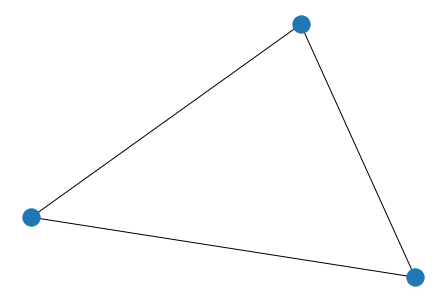

In [25]:
G.add_edge('Buenos Aires', 'Córdoba', distancia=647)
G.add_edge('Buenos Aires', 'Mendoza', distancia=948)
G.add_edge('Córdoba',      'Mendoza', distancia=682)

nx.draw(G)

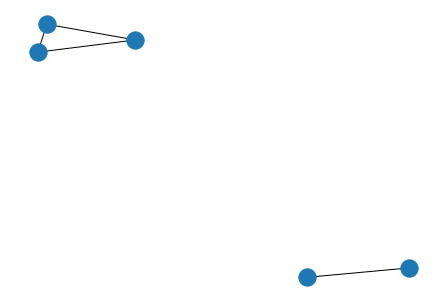

In [26]:
G.add_edge('Tucumán','Salta', distancia=227)

nx.draw(G)

* **Subgrafo**: subconjunto de nodos y conexiones.
* **Componente conectada**: *cluster* de nodos conectados.

In [54]:
G.nodes

NodeView(('Buenos Aires', 'Córdoba', 'Mendoza', 'Tucumán', 'Salta'))

In [55]:
G.edges

EdgeView([('Buenos Aires', 'Córdoba'), ('Buenos Aires', 'Mendoza'), ('Córdoba', 'Mendoza'), ('Tucumán', 'Salta')])

In [57]:
# grado de un nodo (cantidad de conexiones)
G.degree['Mendoza']

2

### Graficando

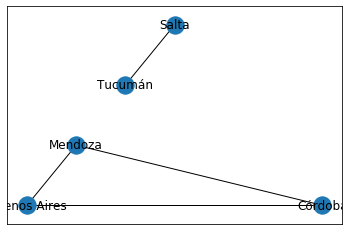

In [53]:
# posiciones de los nodos; elegir un *layout*
pos=nx.planar_layout(G)

# dibujar etiquetas
nx.draw_networkx_labels(G, pos=pos)

# dibujar nodos
nx.draw_networkx_nodes(G, pos=pos)

# dibujar conexiones
nx.draw_networkx_edges(G, pos=pos);

## Tipos de grafos

### Dirigido

`nx.DiGraph`

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a2/Directed.svg" width=200>

### Multigrafo

`nx.MultiGraph`, `nx.MultiDiGraph`

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c9/Multi-pseudograph.svg" width=200>

## Algoritmos comunes

### Grafo de ejemplo: Familias florentinas

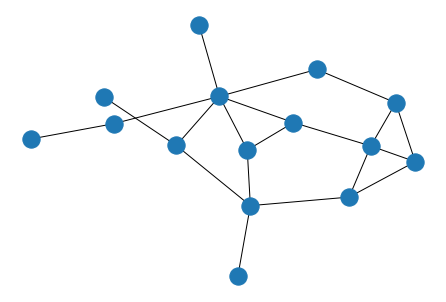

In [65]:
G = nx.florentine_families_graph()

nx.draw(G)

## Componentes conectadas

https://en.wikipedia.org/wiki/Component_(graph_theory)

<img src="https://upload.wikimedia.org/wikipedia/commons/8/85/Pseudoforest.svg" width=200>

In [64]:
# el grafo de ejemplo solo tiene una componente conectada
for sub_graph in nx.connected_components(G):
    print(sub_graph)

{'Strozzi', 'Bischeri', 'Acciaiuoli', 'Salviati', 'Pazzi', 'Castellani', 'Ridolfi', 'Albizzi', 'Peruzzi', 'Medici', 'Ginori', 'Lamberteschi', 'Barbadori', 'Tornabuoni', 'Guadagni'}


## El camino más corto

https://en.wikipedia.org/wiki/Shortest_path_problem

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3b/Shortest_path_with_direct_weights.svg" width=200>

#### Aplicaciones

* Google Maps
* LinkedIn

In [67]:
nx.shortest_path(G, source='Medici', target='Ginori', weight=None)

['Medici', 'Albizzi', 'Ginori']

## Árbol recubridor mínimo

https://en.wikipedia.org/wiki/Minimum_spanning_tree

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Minimum_spanning_tree.svg" width=200>

#### Aplicaciones

* Tendido de redes

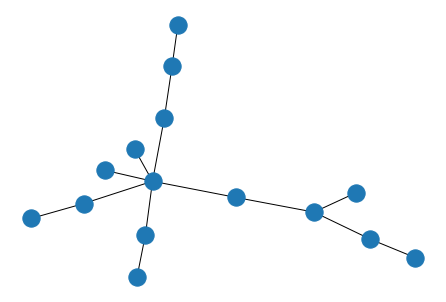

In [68]:
mst = nx.minimum_spanning_tree(G, weight=None)

nx.draw(mst)

## Pagerank

https://en.wikipedia.org/wiki/PageRank

<img src="https://upload.wikimedia.org/wikipedia/en/8/8b/PageRanks-Example.jpg" width=200>

https://towardsdatascience.com/investor-network-of-influence-f80f2a1af43f

In [60]:
nx.pagerank(G, weight=None)

{'Acciaiuoli': 0.03065721480230426,
 'Medici': 0.14581844065218275,
 'Castellani': 0.06933028447008721,
 'Peruzzi': 0.06787531774407572,
 'Strozzi': 0.08809849082725613,
 'Barbadori': 0.050300712744633685,
 'Ridolfi': 0.069574170990148,
 'Tornabuoni': 0.07127928374676082,
 'Albizzi': 0.079121502380729,
 'Salviati': 0.061302640987807314,
 'Pazzi': 0.036054222996734095,
 'Bischeri': 0.0688615381141211,
 'Guadagni': 0.09839859717156552,
 'Ginori': 0.032418257716596434,
 'Lamberteschi': 0.03090932465499793}

## Intermediación

https://en.wikipedia.org/wiki/Betweenness_centrality

<img src="https://upload.wikimedia.org/wikipedia/commons/6/60/Graph_betweenness.svg" width=200>

In [61]:
nx.betweenness_centrality(G, weight=None)

{'Acciaiuoli': 0.0,
 'Medici': 0.521978021978022,
 'Castellani': 0.05494505494505495,
 'Peruzzi': 0.02197802197802198,
 'Strozzi': 0.10256410256410257,
 'Barbadori': 0.09340659340659341,
 'Ridolfi': 0.11355311355311355,
 'Tornabuoni': 0.09157509157509157,
 'Albizzi': 0.21245421245421245,
 'Salviati': 0.14285714285714288,
 'Pazzi': 0.0,
 'Bischeri': 0.1043956043956044,
 'Guadagni': 0.2545787545787546,
 'Ginori': 0.0,
 'Lamberteschi': 0.0}

### Modularidad

https://en.wikipedia.org/wiki/Modularity_(networks)

<img src="https://www.pnas.org/content/pnas/103/23/8577/F1.large.jpg" width=200>

In [70]:
nx.algorithms.community.modularity_max.greedy_modularity_communities(G)

[frozenset({'Acciaiuoli',
            'Medici',
            'Pazzi',
            'Ridolfi',
            'Salviati',
            'Tornabuoni'}),
 frozenset({'Barbadori', 'Bischeri', 'Castellani', 'Peruzzi', 'Strozzi'}),
 frozenset({'Albizzi', 'Ginori', 'Guadagni', 'Lamberteschi'})]

## Pandas

In [71]:
import pandas as pd

df = pd.read_csv('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/bicicletas-publicas/recorridos-realizados-2019.csv')

/home/matias/.pyenv/versions/3.7.3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
df.head()

,bici_id_usuario,bici_fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,115783_0,2019-01-01 00:01:16,00:07:02,Estados Unidos,168_0,9 de Julio,112_0,FEMENINO,36.0
1,345364_0,2019-01-01 00:04:32,00:05:33,Colegio Nacional Buenos Aires,47_0,Colegio Nacional Buenos Aires,47_0,MASCULINO,40.0
2,570578_0,2019-01-01 00:09:15,00:19:45,Pueyrredón,144_0,Ecoparque,44_0,FEMENINO,41.0
3,588687_0,2019-01-01 00:09:28,00:19:34,Pueyrredón,144_0,Ecoparque,44_0,MASCULINO,43.0
4,127201_0,2019-01-01 00:11:17,00:21:32,Legislatura,16_0,EEUU y Boedo,199_0,MASCULINO,33.0


The Pandas DataFrame should contain at least two columns of node names and zero or more columns of edge attributes. **Each row will be processed as one edge instance**.

In [80]:
df['minutos_viaje'] = pd.to_timedelta(df.bici_tiempo_uso, unit='minute', errors='coerce')

In [89]:
pre_grafo = df.groupby(['bici_nombre_estacion_origen','bici_nombre_estacion_destino']) \
    .minutos_viaje \
    .agg(lambda x: x.mean()) \
    .to_frame() \
    .reset_index()


pre_grafo.head()

,bici_nombre_estacion_origen,bici_nombre_estacion_destino,minutos_viaje
0,001 - Facultad De Derecho,001 - Facultad De Derecho,00:47:08.372451
1,001 - Facultad De Derecho,002 - Retiro I,00:15:24.335766
2,001 - Facultad De Derecho,003 - Aduana,00:27:46.038461
3,001 - Facultad De Derecho,004 - Plaza Roma,00:25:21.500000
4,001 - Facultad De Derecho,005 - Plaza Italia,00:40:21.257270


In [94]:
estaciones = nx.convert_matrix.from_pandas_edgelist(
    pre_grafo,
    source='bici_nombre_estacion_origen',
    target='bici_nombre_estacion_destino',
    edge_attr='minutos_viaje'
)

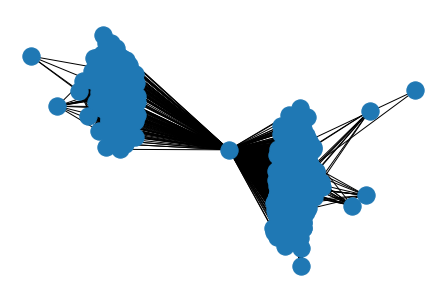

In [95]:
nx.draw(estaciones)

## Práctica

### Dataset

https://data.buenosaires.gob.ar/dataset/bicicletas-publicas

### Ideas

* https://medium.com/@fcatalano/bicisendas-en-buenos-aires-a29f62bc9e7c — "La red de bicicletas fue diagramada como un **grafo dirigido**. Esto, porque nos interesaba representar los recorridos realizados respetando el sentido de los viajes."

  * Análisis exploratorio del dataset
  * Análisis de *in-degree* y *out-degree*

* https://towardsdatascience.com/buenos-aires-bicycle-lanes-ii-1a40b13ccc25 — "\[...\] we built a graph **where two users shared a link if and only if at least one of them had taken a bicycle at approximately the same time from the same station, and returned them together** (also to the same station)."

  * Distribución grados
  * Análisis exploratorio del grafo

* https://medium.com/@martinpalazzo/buenos-aires-bicycle-lanes-iii-d0ca4539e767 — "The first step to understand the communities of stations is to build a network where each node is a station and **each edge between station is the quantity of bicycle journeys**."

  * Modularidad
  * Clustering espectral